In [1]:
import sys
sys.path.insert(0, "../")

In [2]:
#import importlib
import numpy as np
import matplotlib.pyplot as plt
import airsim
from matplotlib import style

from general_tools.road_lines import *
from general_tools.utils import *

style.use("ggplot")

In [3]:
lines = load_road_lines("../data/lm/lm_7_5.txt")
lines[:5]

[(array([-0.01136719, -0.00273437, -1.30514646]),
  array([-4.94201183,  5.68705082, -1.18141603])),
 (array([-4.94201183,  5.68705082, -1.18141603]),
  array([-11.15556622,   9.97062492,  -1.41391599])),
 (array([-11.15556622,   9.97062492,  -1.41391599]),
  array([-17.82157135,  13.43909168,  -1.69542968])),
 (array([-17.82157135,  13.43909168,  -1.69542968]),
  array([-24.78668976,  16.31256866,  -1.98066401])),
 (array([-24.78668976,  16.31256866,  -1.98066401]),
  array([-32.17603302,  17.72357368,  -2.43827152]))]

In [4]:
car_client = airsim.CarClient()
car_client.confirmConnection()
car_client.enableApiControl(False)

Connected!
Client Ver:1 (Min Req: 1), Server Ver:1 (Min Req: 1)



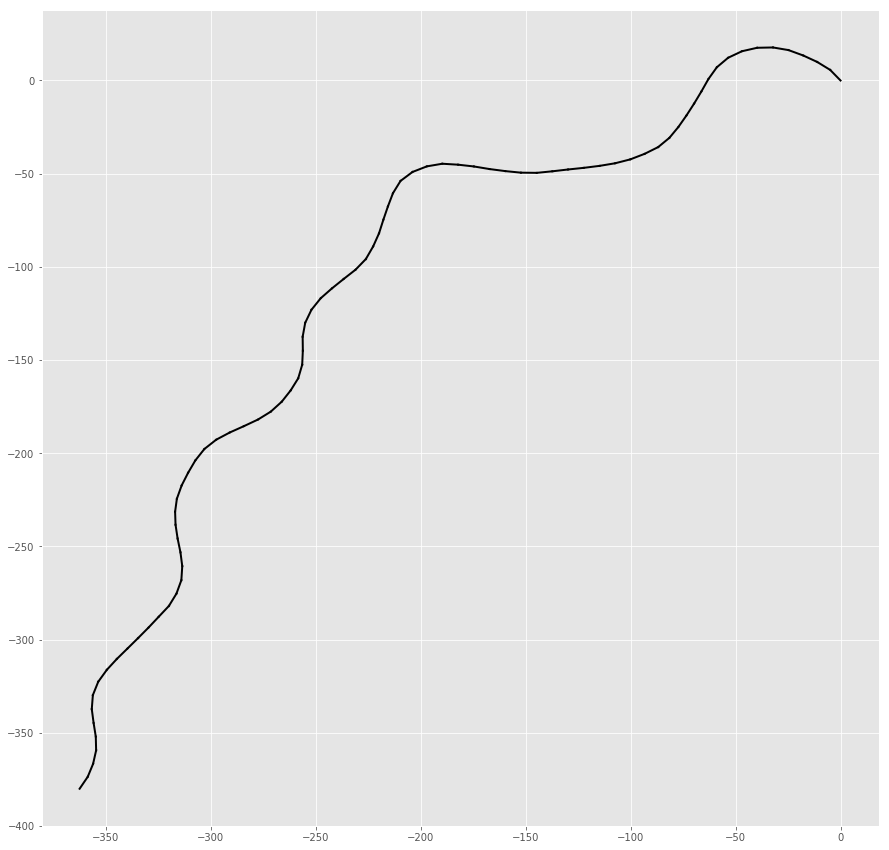

In [5]:
draw_road_lines(lines)

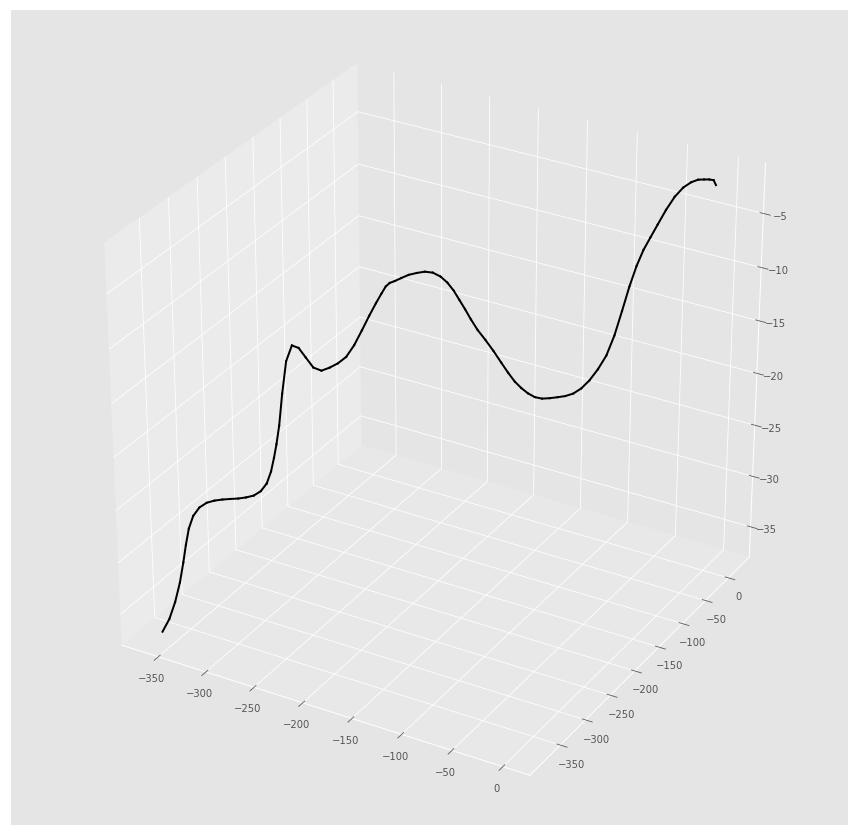

In [6]:
draw_road_lines_3D(lines)

In [7]:
cp = car_client.simGetGroundTruthKinematics().position

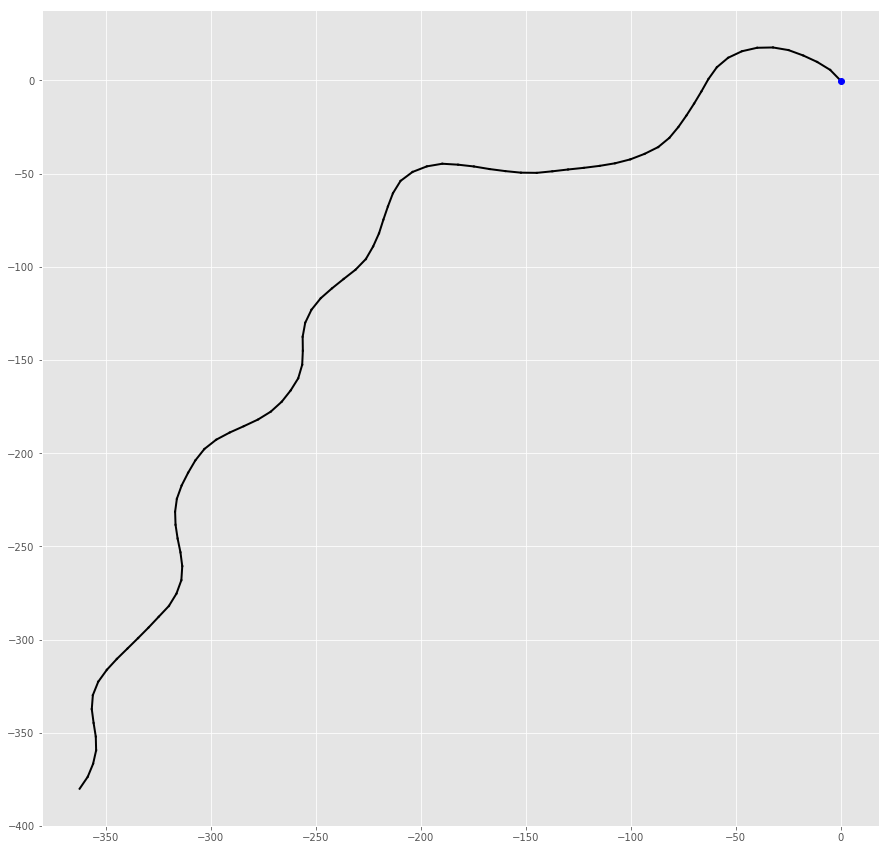

In [8]:
draw_road_lines(lines, cp)

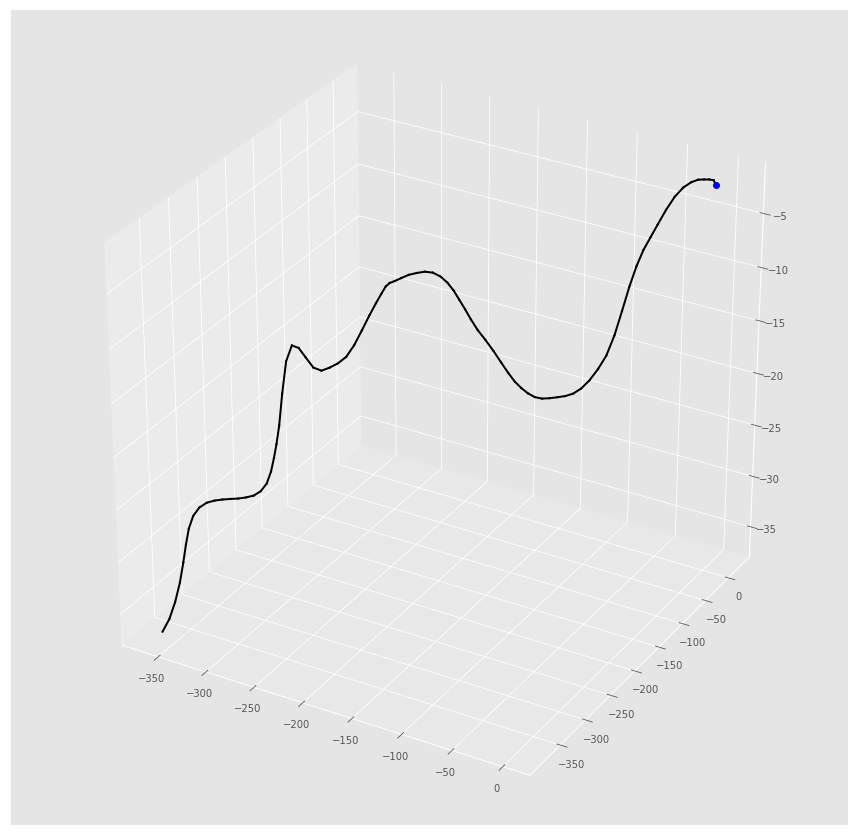

In [9]:
draw_road_lines_3D(lines, cp)

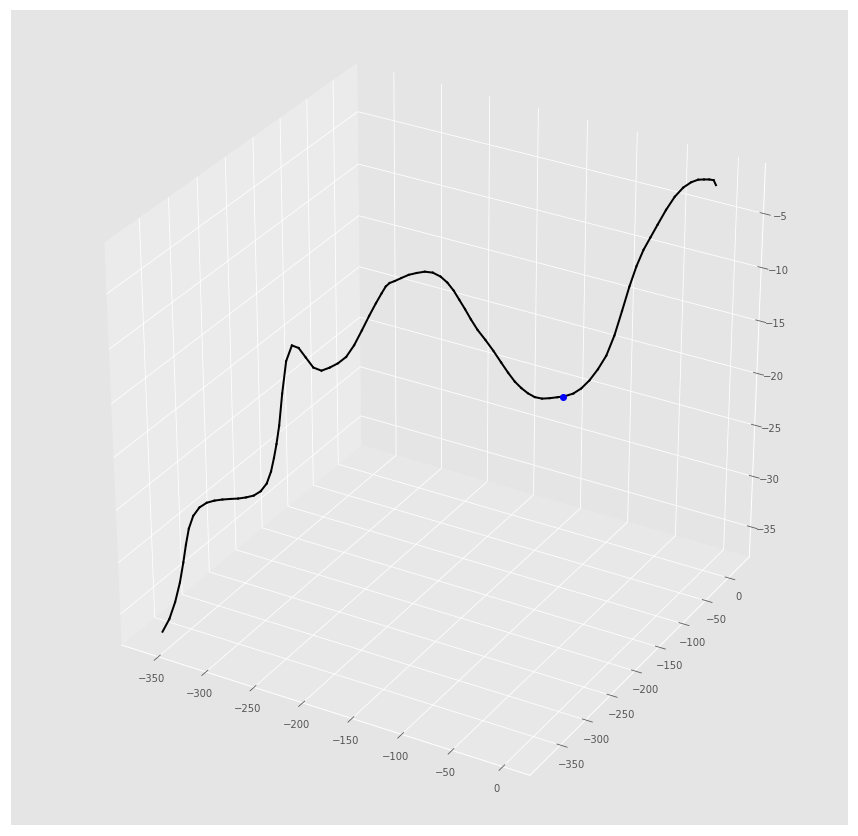

In [10]:
cp = car_client.simGetGroundTruthKinematics().position
draw_road_lines_3D(lines, cp)

In [11]:
def get_image():
    image_response = car_client.simGetImages([airsim.ImageRequest(0, airsim.ImageType.Scene, False, False)])[0]
    image1d = np.frombuffer(image_response.image_data_uint8, dtype=np.uint8)
    image_rgba = image1d.reshape(image_response.height, image_response.width, 3)

    return image_rgba[70:135, 0:255, :]

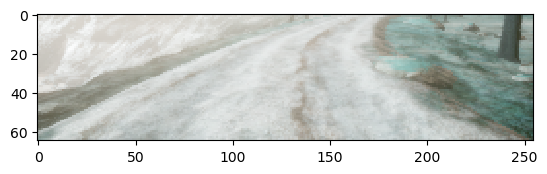

In [16]:
style.use("default")
plt.imshow(get_image())

In [14]:
get_image().shape

(65, 255, 3)

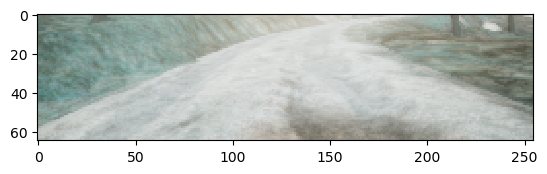

In [17]:
plt.imshow(get_image())